In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib.patches as mpatches

In [24]:
city_data = 'raw_data/city_data.csv'
ride_data = 'raw_data/ride_data.csv'

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [25]:
pyber_df = pd.merge(city_data_df,ride_data_df,how = 'inner',on = "city")
pyber_drop_df = pyber_df.drop_duplicates(subset = "ride_id")

In [26]:
pyber_group_city_df = pyber_drop_df.groupby(["city"])

In [27]:
avg_fare_city = pyber_group_city_df["fare"].mean()

In [28]:
rides_per_city = pyber_group_city_df["ride_id"].count()

In [29]:
drivers_per_city = pyber_group_city_df["driver_count"].count()

In [30]:
city_type = pyber_group_city_df["type"].unique()

In [31]:
total_stats_df = pd.DataFrame({"Average far($) per city":avg_fare_city,
                              "Total rides per city":rides_per_city,
                              "Total Drivers per city":drivers_per_city,
                              "City Type":city_type})

In [32]:
pyber_citytype_df = pyber_drop_df.groupby(["type"])

In [33]:
total_fare = pyber_citytype_df["fare"].sum()

In [34]:
total_rides = pyber_citytype_df["ride_id"].count()

In [35]:
city_data_group_citytype = city_data_df.groupby(["type"])
total_drivers_per_city_type = city_data_group_citytype["driver_count"].sum()

In [36]:
total_drivers = total_drivers_per_city_type

In [37]:
total_type_df = pd.DataFrame({"Total Fare": total_fare,
                             "Total Rides": total_rides,
                             "Total Drivers":total_drivers})

In [38]:
total_drivers = total_type_df["Total Drivers"]
labels = ["Rural","Suburban","Urban"]

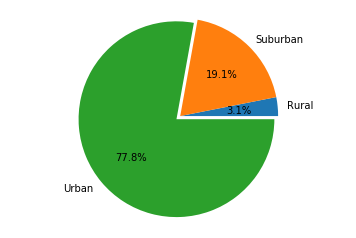

In [39]:
plt.pie(total_drivers, labels = labels,autopct = "%1.1f%%", explode = [0,0,0.05])
plt.axis("equal")
plt.show()

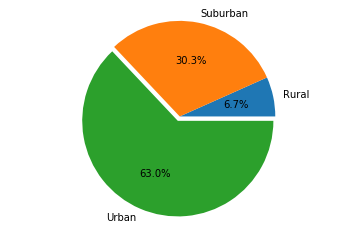

In [40]:
total_fare_citytype = total_type_df["Total Fare"]
plt.pie(total_fare_citytype, labels = labels,autopct = "%1.1f%%",explode = [0,0,0.05])
plt.axis("equal")
plt.show()

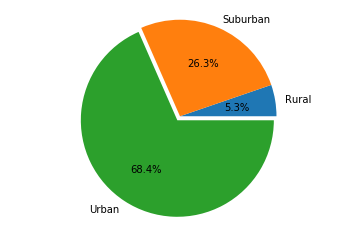

In [41]:
total_rides_citytype = total_type_df["Total Rides"]
plt.pie(total_rides_citytype, labels = labels,autopct = "%1.1f%%",explode = [0,0,0.05])
plt.axis("equal")
plt.show()

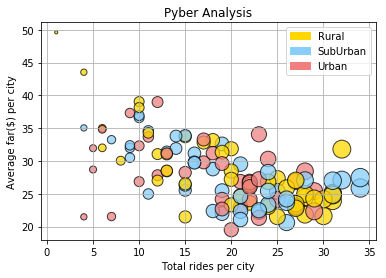

In [48]:
plt.scatter(total_stats_df["Total rides per city"],total_stats_df["Average far($) per city"], marker="o", 
            facecolors=["gold","lightskyblue","lightcoral"], edgecolors="black",
            s=total_stats_df["Total Drivers per city"]*10,alpha=0.75)
Gold = mpatches.Patch(color = "Gold", label = "Rural")
LightSkyBlue = mpatches.Patch(color = "lightskyblue", label = "SubUrban")
LightCoral = mpatches.Patch(color = "lightcoral", label = "Urban")
plt.legend(handles= [Gold,LightSkyBlue,LightCoral], loc = 'best')
plt.grid(True)
plt.title("Pyber Analysis")
plt.xlabel("Total rides per city")
plt.ylabel("Average far($) per city")
plt.show()

#### Observations:
1. Urban areas has more drivers.
2. The more the rides the less the price is.
3. Urban areas has more revenue.
4. Urban areas has more rides.